In [1]:
from localgraphclustering import *

import time
import numpy as np

# Load graph

In [ ]:
# Read graph. This also supports gml format.
start = time.time()
g = graph_class_local.GraphLocal('/Users/kimonfountoulakis/Downloads/com-orkut.ungraph.edgelist','edgelist','\t')
end = time.time()
print("running time:",str(end-start)+"s")

# To get a quick look at the list of methods and attributes for the graph object 'g' you can type 'g.' + tab
# and scroll up or down.

The following nodes have no outgoing edges: [      0      12      92 ..., 3072586 3072587 3072588] 

These nodes are stored in the your_graph_object._dangling.
To avoid numerical difficulties we connect each dangling node to another randomly chosen node.


/usr/local/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


# Create objects for spectral local graph partitioning methods

In [ ]:
# Create an object for an accelerated L1-regularized PageRank solver.
l1reg_fast = l1_regularized_PageRank_fast.L1_regularized_PageRank_fast()

# Example: produce embeddings using l1-regularized PageRank

In [5]:
# Find the solution of L1-regularized PageRank using localized accelerated gradient descent.
# This method is the fastest among other l1-regularized solvers and other approximate PageRank solvers.
output_l1reg_fast = l1reg_fast.produce([g],[3215])

# Create objects for rounding methods

In [7]:
# Create an object for a C++ version of the sweep cut rounding procedure.
sc_fast = sweepCut_fast.SweepCut_fast()

# Examples for rounding algorithms

In [8]:
# Call C++ version of sweep cut rounding on the l1-regularized PageRank solution.
output_sc_fast = sc_fast.produce([g],p=output_l1reg_fast[0])

# Example of flow-based local graph partitioning

In [ ]:
# Create an object for the C++ version of Capacity Releasing Diffusion
crd_fast = capacity_releasing_diffusion_fast.Capacity_Releasing_Diffusion_fast()

#Produce result
output_crd_fast = crd_fast.produce([g],[3215])
print("Conductance:",g.compute_conductance(output_crd_fast[0]))

# Densest subgraph 

In [16]:
#How to use densest subgraph method.
g = graph_class_local.GraphLocal('./datasets/Erdos02-cc.edgelist','edgelist',' ')

# Create an object for densest subgraph.
ds_fast = densest_subgraph_fast.densest_subgraph_fast()

# Produce result
output_ds_fast = ds_fast.produce([g])
print("Maximum density we found:",output_ds_fast[0][0])

Maximum density we found: 4.971153846153846


# CRD Network Community Profile

The following nodes have no outgoing edges: [   0    1    2 ..., 6401 6463 6471] 

These nodes are stored in the your_graph_object._dangling.
To avoid numerical difficulties we connect each dangling node to another randomly chosen node.


/usr/local/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


There are  1  connected components in the graph


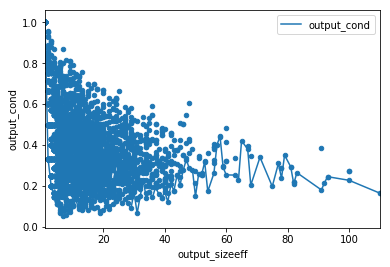

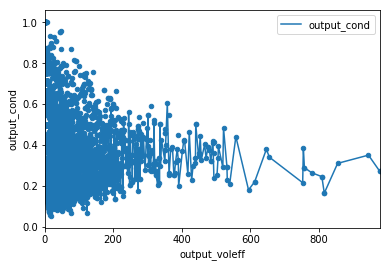

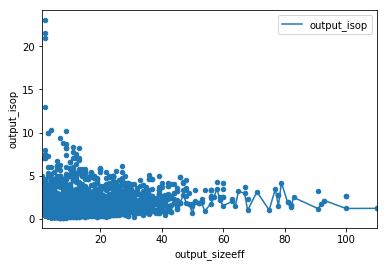

In [18]:
ncp_instance = ncp.Ncp()
df = ncp_instance.produce(g,"crd",w=10,U=10,h=1000)
ncp_plots = ncpplots.NCPPlots(df)
#plot conductance vs size
ncp_plots.cond_by_size()
#plot conductance vs volume
ncp_plots.cond_by_vol()
#plot isoperimetry vs size
ncp_plots.isop_by_size()